
# **이어지는 분석**
<br>

## 파급력 분석하기
power = power3 = (기준일 후 게시물 개수 / [(가장 마지막 게시물 날짜- 기준일) / (마지막날짜 - 오래된 날짜) * 100] - 기준일 전 게시물 개수 / [(기준일 - 게시물 중 가장 오래된 날짜) / (마지막날짜 - 오래된 날짜) * 100]

reliability2 = reference_after/(reference_affter - resource_count) * 100%


## 신뢰도 분석하기
reliability1 = resource_count / reference_after * 100% 
***

* resource_count값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(0 , 200))  
* file : power3(사람별 - 해당 미디어의 영향력) power3값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))  * (사람별 - 영향력의 크기) reliability2값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))  
* (사람별 - 글을 작성할 확률) reliability값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))     
* ~~글씨체 정하기~~    
* 산점도 그리기 : (resource - power3) (20 - (-? - ?))    
* 히트맵 : 블로그 게시물 개수(200개 아님)   
* 시계열 / 워드 클라우드(자주 사용하는 단어 찾기) 47- 하니칼국수 - 성시경 / 181-코카모메-츄릅켠 / 270-전참시-몽탄    
* 분산분석(미디어별 - 해당 미디어의 영향력) power3값    
* 분산분석(미디어별 - 영향력의 크기) reliability2값    
* 분산분석(미디어별 - 글을 작성할 확률) reliability값    

## 논점
- 2차 생산물을 알지 못함
- 모집단을 조사한 것이 아니라 일부 표본을 조사한 것
- 작성자의 해시태그와 게시글을 통해 작성자의 취향을 파악하여, 마케팅에 사용할 수 있을 것

In [ ]:
# 폰트 임시파일이 설치된 곳
# 새로 설치한 폰트가 적용이 안된다면 이곳의 임시파일 삭제하세요
matplotlib.get_cachedir()

# 캡쳐하는 법
%%capture() - #셀 제일 위에 적기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트설정
from matplotlib import font_manager, rc
font_path = "./data/font/21582067_G마켓산스Medium_OTF.otf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print("폰트설정 :", font_name)
rc('font', family=font_name)

# 색깔 설정
my_colors = sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10)
my_colors2 = sns.color_palette("RdPu", 1) + sns.color_palette("Purples", 1) + sns.color_palette("Blues", 1)

# 데이터 가져오기
data = pd.read_csv("./data/instagram/instagramtotal.csv")
display(data)

폰트설정 : Gmarket Sans


,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,group,postsNumber
0,6시내고향,새만금횟집,2016-09-04,2099-12-31,2021-10-21,30433,-28560,0,8,90,-0.063947,100.000000,0.000000,방송프로그램,2506
1,6시내고향,바로방,2017-05-15,2099-12-31,2021-10-20,30180,-28561,0,7,93,-0.056473,100.000000,0.000000,방송프로그램,6633
2,6시내고향,슬지네찐빵,2018-02-07,2099-12-31,2021-10-21,29912,-28560,0,9,91,-0.047146,100.000000,0.000000,방송프로그램,4386
3,6시내고향,메밀꽃필무렵,2021-10-16,2099-12-31,2021-10-21,28565,-28560,0,0,98,-0.000172,100.000000,0.000000,방송프로그램,33575
4,6시내고향,원조유박사곱창,2017-11-04,2099-12-31,2021-09-29,30007,-28582,0,98,2,-0.047536,100.000000,0.000000,방송프로그램,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,츄릅켠,코카모메,2019-11-25,2099-12-31,2021-10-21,29256,-28560,0,1,199,-0.048734,100.000000,0.000000,유튜버,3527
91,츄릅켠,시그니엘부산더뷰,2021-01-09,2021-09-30,2021-10-21,264,21,1,86,12,0.700162,109.090909,8.333333,유튜버,369
92,츄릅켠,금돼지식당,2021-05-31,2099-12-31,2021-10-21,28703,-28560,0,0,98,-0.004907,100.000000,0.000000,유튜버,27211
93,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98,-0.012525,100.000000,0.000000,유튜버,241


In [3]:
# 데이터 순서 정렬하기
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "정지훈", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의달인", "6시내고향", "골목식당", "생방송오늘저녁", "모닝와이드", "맛있는녀석들", "생방송투데이"]
groups = 연예인 + 유튜버 + 방송프로그램
temp = pd.DataFrame()
for i, media in enumerate(groups):
    temp = temp.append(data.loc[data.mediaName == media])
data = temp.copy()
display(data)

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,group,postsNumber
68,이영자,산골농원,2020-02-05,2020-02-05,2021-10-21,0,624,42,0,198,NaN,126.923077,21.212121,연예인,13243
69,이영자,도동집,2016-06-18,2021-03-16,2021-10-21,1732,219,66,6,194,17.215244,151.562500,34.020619,연예인,7850
70,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036,17,1,199,2.389422,109.340659,8.542714,연예인,11175
71,이영자,아이맛이야장작철판구이,2020-03-01,2020-03-01,2021-10-17,0,595,25,0,99,NaN,133.783784,25.252525,연예인,1807
72,이영자,엘더버거,2019-07-29,2021-07-31,2021-10-20,733,81,16,6,194,19.429172,108.988764,8.247423,연예인,2939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,생방송투데이,삼고집파주점,2017-10-15,2099-12-31,2021-10-21,30027,-28560,0,1,24,-0.012816,100.000000,0.000000,방송프로그램,998
39,생방송투데이,어거스트힐,2019-12-09,2099-12-31,2021-10-21,29242,-28560,0,4,83,-0.020753,100.000000,0.000000,방송프로그램,6017
40,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570,0,3,97,-0.033359,100.000000,0.000000,방송프로그램,426
41,생방송투데이,레드브릿지,2020-04-18,2099-12-31,2021-10-21,29111,-28560,0,1,98,-0.019096,100.000000,0.000000,방송프로그램,28333


<br>

# **시각화 하기**

## 1. 산점도 그리기 : (resource - power3) (20 - (-? - ?))

C:\Users\milky\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


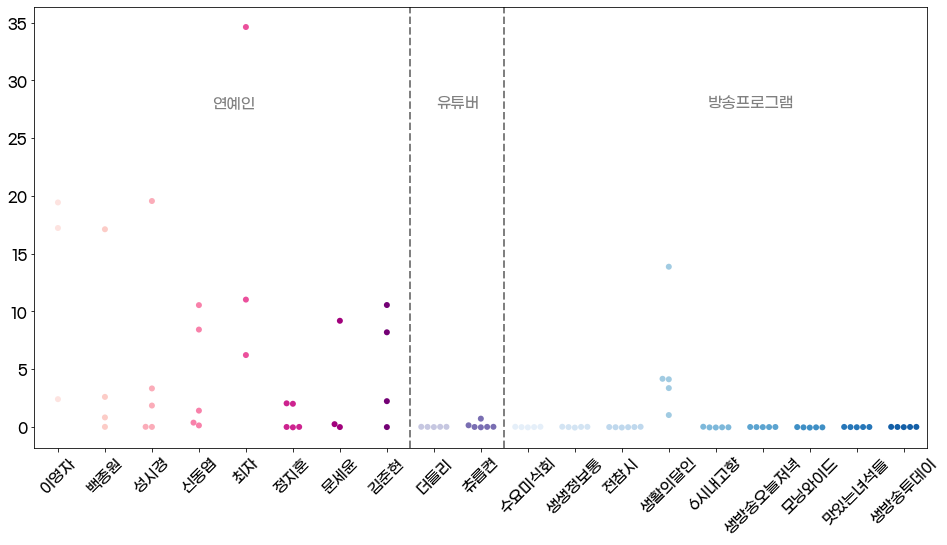

In [18]:
# 축 폰트 사이즈 설정
plt.rc('font', size=15)

# (mediaName - power)산점도 그리기
# 그래프 크기
plt.figure(figsize=(16, 9))

#이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="mediaName",      #x축 변수
              y="power",        #y축 변수
              data=data,
              palette=my_colors,
              size = 6)   #데이터셋 - 데이터프레임

plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
plt.text(3.75, data["power"].max() * 0.80, "연예인",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')

plt.text(8.5, data["power"].max() * 0.80, "유튜버",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')

plt.text(14.75, data["power"].max() * 0.80, "방송프로그램",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.ylabel(None)
plt.xlabel(None)
plt.savefig('./output/instagram/scatter_instagram.png', transparent = True)
plt.show()

<br>

## 2. 나무맵 : 인스타그램 해시태그 게시물 개수(100개)

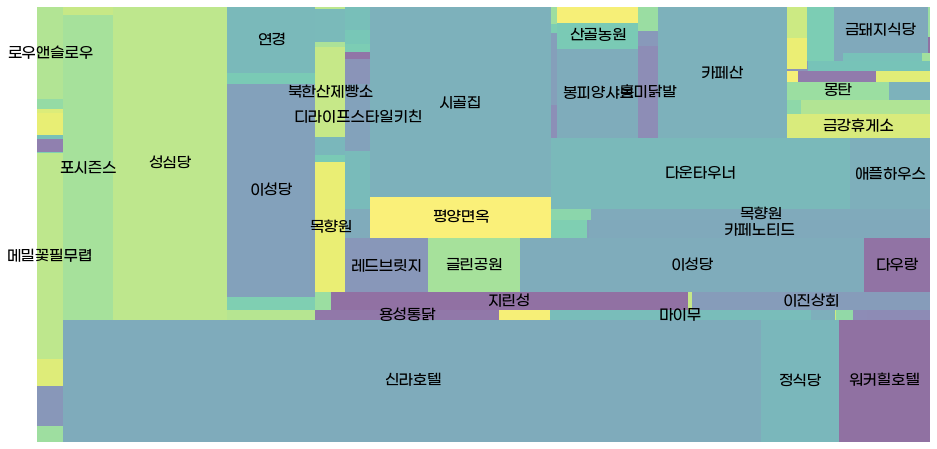

In [136]:
import squarify

# 나무맵 : 전수조사용
# 그래프 크기
plt.figure(figsize=(16,8))

# 라벨 구하기
temp = data.copy()
#temp = temp.sort_values(by="postsNumber", ascending = False)
temp.loc[temp["postsNumber"] <= 10000,"restaurant"] = ""
squarify.plot(sizes=data["postsNumber"], label = temp["restaurant"], alpha=0.6)
plt.axis('off')
plt.savefig('./output/instagram/treemap_instagram.png')
plt.show()

<br>

## 3. 막대 그래프 그리기
* file : power3(사람별 - 해당 미디어의 영향력) power3값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))
* (사람별 - 영향력의 크기) reliability2값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))
* (사람별 - 글을 작성할 확률) reliability값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))

In [137]:
# 평균 값의 데이터프레임 만들기
df1 = data.groupby("mediaName").mean()
display(df1)

# 데이터 순서 정렬하기
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "정지훈", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의달인", "6시내고향", "골목식당", "생방송오늘저녁", "모닝와이드", "맛있는녀석들", "생방송투데이"]
groups = 연예인 + 유튜버 + 방송프로그램
temp = pd.DataFrame()
for i, media in enumerate(groups):
    temp = temp.append(df1.loc[df1.index == media])
df1 = temp.copy()

,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,postsNumber
mediaName,,,,,,,,,
6시내고향,29819.400000,-28564.600000,0.000000,24.400000,74.800000,-0.043055,100.000000,0.000000,9460.600000
김준현,6411.000000,-5505.800000,3.600000,41.600000,57.600000,5.228045,105.462074,5.072222,1718.400000
더들리,28897.600000,-28560.000000,0.000000,2.000000,98.000000,-0.011816,100.000000,0.000000,153180.800000
맛있는녀석들,29327.000000,-28559.400000,0.000000,4.000000,95.800000,-0.026768,100.000000,0.000000,70886.200000
모닝와이드,30073.000000,-28560.000000,0.000000,32.400000,67.000000,-0.051721,100.000000,0.000000,14518.000000
문세윤,10289.666667,-9258.333333,4.666667,22.000000,64.666667,3.124600,107.686120,6.992853,869.000000
백종원,5994.400000,-5312.800000,12.800000,14.200000,85.600000,5.122137,117.064947,13.296063,9047.000000
생방송오늘저녁,29315.000000,-28559.600000,0.000000,5.800000,94.200000,-0.026413,100.000000,0.000000,14192.200000
생방송투데이,29360.000000,-28562.000000,0.000000,1.800000,79.200000,-0.019417,100.000000,0.000000,13405.000000


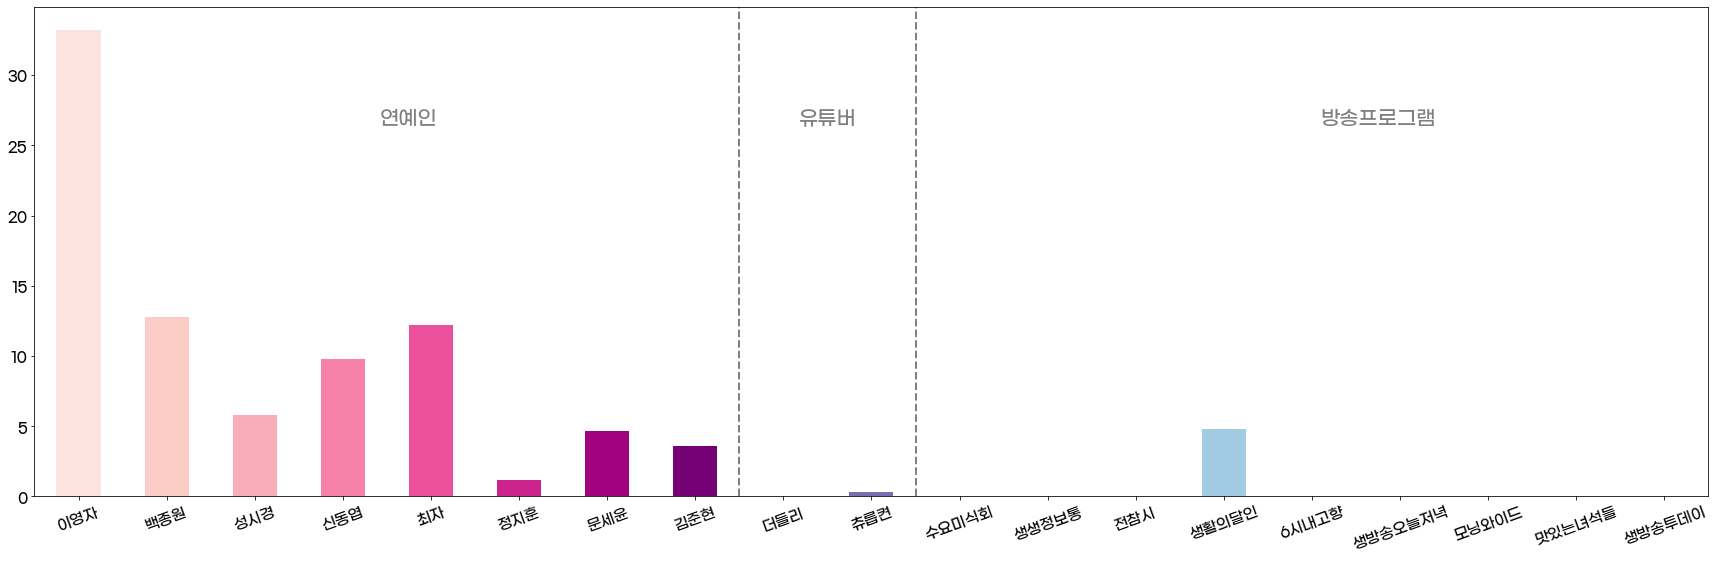

In [138]:
# matplotlib

plt.figure(figsize=(30,10))
df1.countName.plot(kind='bar', color=my_colors)
# 기준선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, df1["countName"].max() * 0.80, "연예인",       
         fontsize = 20, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, df1["countName"].max() * 0.80, "유튜버",       
         fontsize = 20, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, df1["countName"].max() * 0.80, "방송프로그램",       
         fontsize = 20, 
         color='gray',
         horizontalalignment='center')
plt.xticks(rotation=20)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.show()

C:\Users\milky\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


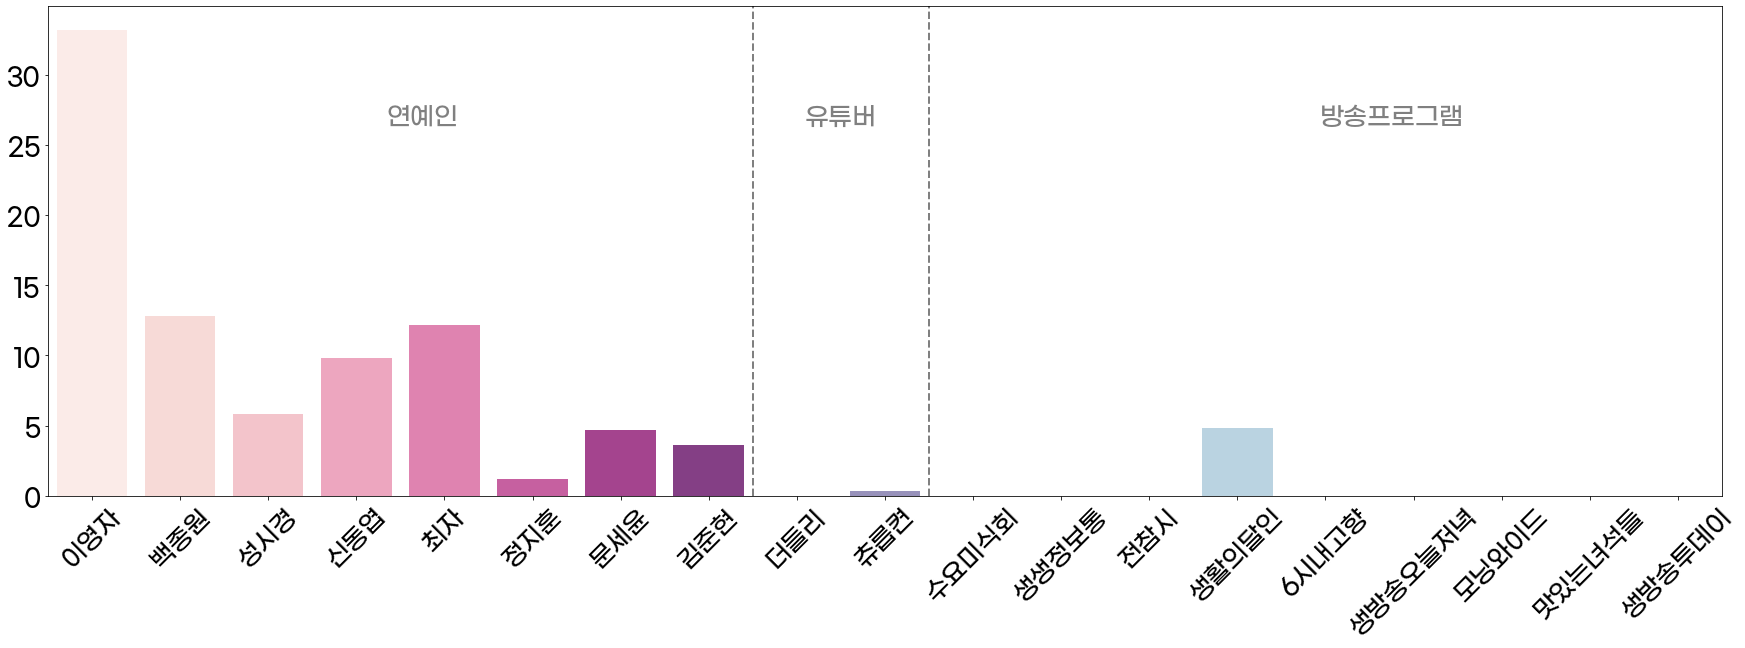

In [139]:
plt.rc('font', size=25)

# seaborn
plt.figure(figsize=(30,10))
sns.barplot(df1.index, df1.countName, palette=my_colors, alpha  = 0.8)
# 기준선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, df1["countName"].max() * 0.80, "연예인",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, df1["countName"].max() * 0.80, "유튜버",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, df1["countName"].max() * 0.80, "방송프로그램",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.savefig('./output/instagram/countmeanbyperson_instagram.png', transparent = True)
plt.show()

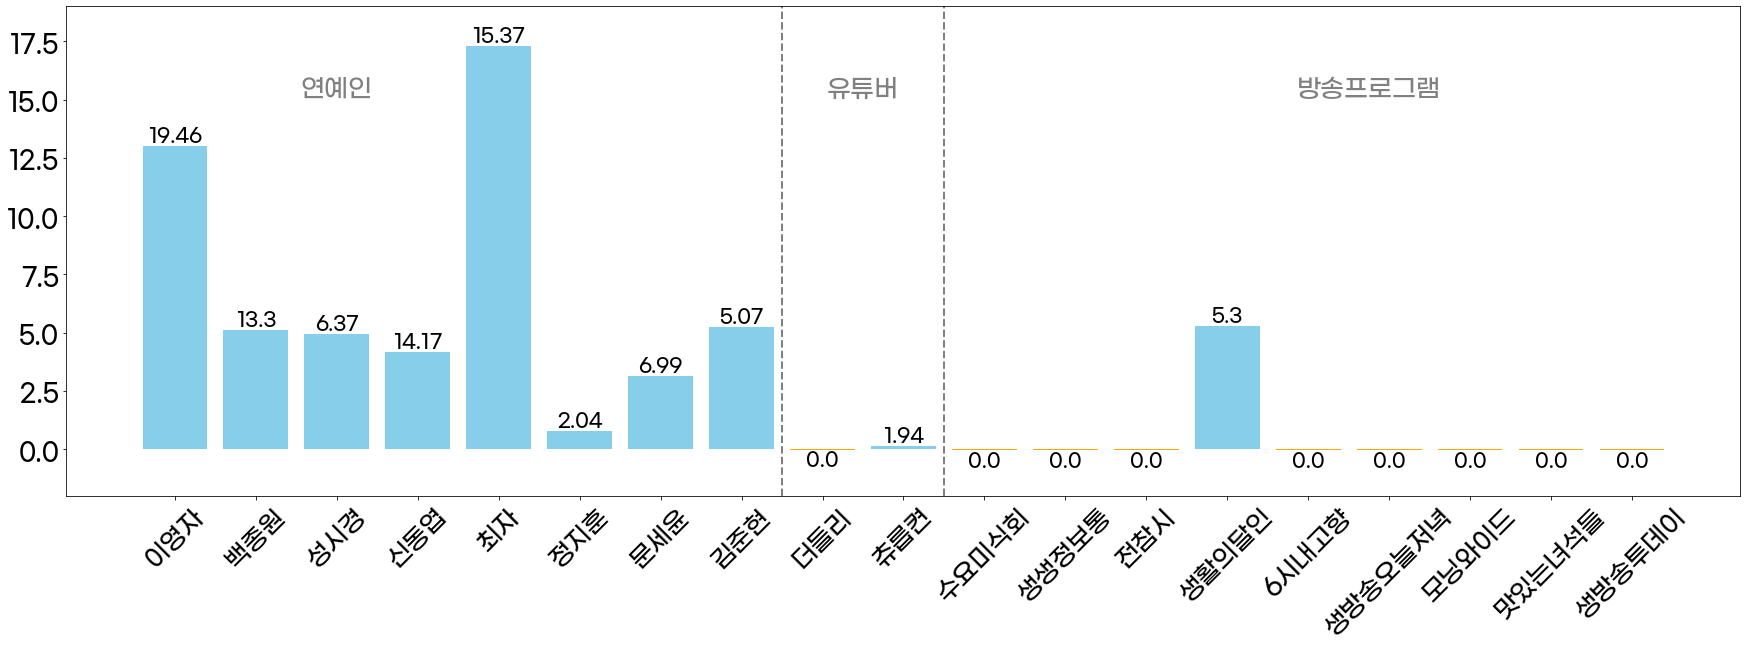

In [140]:
import numpy as np

plt.figure(figsize=(30,10))

x = df1.index
y = df1.power
my_color = np.where(y>=0, 'skyblue', 'orange')
plt.bar(x, y, color=my_color)

for i, v in enumerate(x):
    if df1.power[i] > 0:
        plt.text(v, y[i], round(df1.reliability[i], 2),       
                 fontsize = 20, 
                 color='black',
                 horizontalalignment='center',  
                 verticalalignment='bottom') 
    else :
        plt.text(v, y[i], round(df1.reliability[i], 2),       
                 fontsize = 20, 
                 color='black',
                 horizontalalignment='center',  
                 verticalalignment='top')
# 구분선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(2, 19 * 0.80, "연예인",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, 19 * 0.80, "유튜버",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, 19 * 0.80, "방송프로그램",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.ylim(-2,19)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.savefig('./output/instagram/powerBar_instagram1.png', transparent = True)
plt.show()
plt.rc('font', size=15)

<br>

## 4. 분산분석을 통하여 3개 이상의 집단 간에 차이가 존재하는지 분석

가설1 : 미디어에 따라 파급력의 차이가 있는가?  
가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?  
가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?  

<hr>

분산분석(미디어별 - 해당 미디어의 영향력) power값 

분산분석(미디어별 - 영향력의 크기) reliability2값 

분산분석(미디어별 - 글을 작성할 확률) reliability값  

In [156]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.power
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.power
x3 = data.groupby("group").get_group('연예인')
x3 = x3.power

In [157]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

BartlettResult(statistic=110.60703082122164, pvalue=9.59375066631333e-25)
LeveneResult(statistic=nan, pvalue=nan)
KstestResult(statistic=0.47035573122529645, pvalue=0.02610505200405544)
KstestResult(statistic=0.6807780320366132, pvalue=9.863614369720608e-10)
KstestResult(statistic=0.7105263157894737, pvalue=0.00010879438186461865)


### 가설1 : 미디어에 따라 파급력의 차이가 있는가?

#### 등분산 검증 결과
: .05보다 크면 등분산을 이룬다고 볼 수 있고, 정규성을 이룬다고 볼 수 있음.

<hr>
bartlett의 검정 결과 p-value가 .05보다 커서, 등분산을 이룸
하지만, x1과 x3의 pvalue 값이 .05보다 작아 정규성을 이루지 않음

In [161]:
# 분산 분석

model = ols("data['power'] ~ data['group']", data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
data['group'],2.0,626.040178,313.020089,11.814921,0.000029
Residual,86.0,2278.451803,26.493626,NaN,NaN


In [162]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['power'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['power'], data['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
방송프로그램    연예인    nan    nan       nan  False
방송프로그램    유튜버 0.7156 0.4773       1.0  False
   연예인    유튜버    nan    nan       nan  False
--------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,nan,0.5566,nan,nan,False
방송프로그램,유튜버,-0.486,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


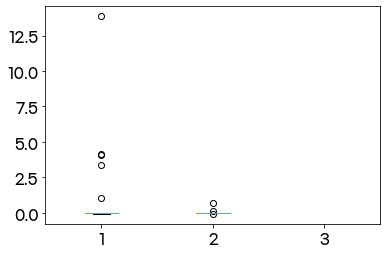

In [163]:
# 집단에 따른 분산

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1,x2, x3]

ax = plt.boxplot(plot_sp)
plt.savefig('./output/instagram/ANOVA_instagram1-1.png', transparent = True)
plt.show()

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,group,postsNumber
71,이영자,아이맛이야장작철판구이,2020-03-01,2020-03-01,2021-10-17,0,595,25,0,99,NaN,133.783784,25.252525,연예인,1807
69,이영자,도동집,2016-06-18,2021-03-16,2021-10-21,1732,219,66,6,194,17.215244,151.562500,34.020619,연예인,7850
70,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036,17,1,199,2.389422,109.340659,8.542714,연예인,11175
72,이영자,엘더버거,2019-07-29,2021-07-31,2021-10-20,733,81,16,6,194,19.429172,108.988764,8.247423,연예인,2939
68,이영자,산골농원,2020-02-05,2020-02-05,2021-10-21,0,624,42,0,198,NaN,126.923077,21.212121,연예인,13243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,생방송투데이,삼고집파주점,2017-10-15,2099-12-31,2021-10-21,30027,-28560,0,1,24,-0.012816,100.000000,0.000000,방송프로그램,998
41,생방송투데이,레드브릿지,2020-04-18,2099-12-31,2021-10-21,29111,-28560,0,1,98,-0.019096,100.000000,0.000000,방송프로그램,28333
40,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570,0,3,97,-0.033359,100.000000,0.000000,방송프로그램,426
39,생방송투데이,어거스트힐,2019-12-09,2099-12-31,2021-10-21,29242,-28560,0,4,83,-0.020753,100.000000,0.000000,방송프로그램,6017


C:\Users\milky\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


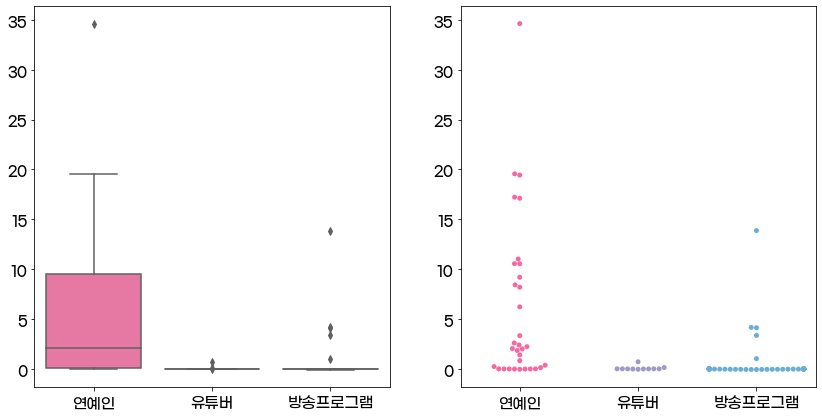

In [164]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
display(data)
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["power"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="power",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/instagram/ANOVA_instagram1-2.png', transparent = True)
plt.show()

In [165]:
x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.reliability
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.reliability
x3 = data.groupby("group").get_group('연예인')
x3 = x3.reliability

In [166]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

BartlettResult(statistic=83.70776346107999, pvalue=6.654112179071982e-19)
LeveneResult(statistic=nan, pvalue=nan)
KstestResult(statistic=0.1857707509881423, pvalue=0.8593308810133607)
KstestResult(statistic=0.7288329519450801, pvalue=2.955569122775614e-11)
KstestResult(statistic=0.6076555023923444, pvalue=0.0017022877039660766)


### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?

#### 등분산 검증 결과
: .05보다 크면 등분산을 이룬다고 볼 수 있고, 정규성을 이룬다고 볼 수 있음.

<hr>
bartlett의 검정 결과 p-value가 .05보다 커서, 등분산을 이룸
하지만, x1과 x3의 pvalue 값이 .05보다 작아 정규성을 이루지 않음

In [167]:
model = ols("data['reliability'] ~ data['group']", data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
data['group'],2.0,2208.310651,1104.155326,25.611006,1.501043e-09
Residual,91.0,3923.240498,43.112533,NaN,NaN


In [168]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['reliability'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['reliability'], data['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat  pval pval_corr reject
-------------------------------------------
방송프로그램    연예인 -6.6108  0.0       0.0   True
방송프로그램    유튜버     nan  nan       nan  False
   연예인    유튜버     nan  nan       nan  False
-------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,9.9445,0.5566,nan,nan,False
방송프로그램,유튜버,nan,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


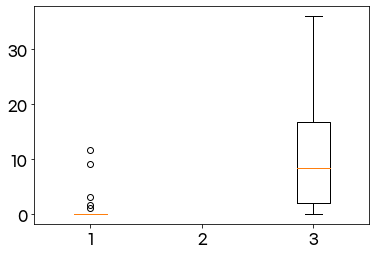

In [169]:
# 집단에 따른 분산

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1,x2, x3]

ax = plt.boxplot(plot_sp)
plt.savefig('./output/instagram/ANOVA_instagram2-1.png', transparent = True)
plt.show()

C:\Users\milky\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


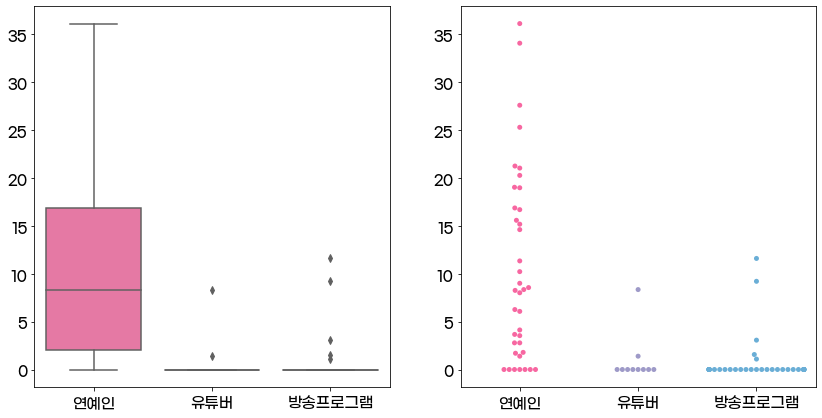

In [170]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["reliability"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="reliability",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/instagram/ANOVA_instagram2-2.png', transparent = True)
plt.show()

In [171]:
x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.reliability2
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.reliability2
x3 = data.groupby("group").get_group('연예인')
x3 = x3.reliability2

In [172]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

BartlettResult(statistic=108.700630859007, pvalue=2.4886161734495166e-24)
LeveneResult(statistic=nan, pvalue=nan)
KstestResult(statistic=0.1857707509881423, pvalue=0.8593308810133607)
KstestResult(statistic=0.7288329519450801, pvalue=2.955569122775614e-11)
KstestResult(statistic=0.6076555023923444, pvalue=0.0017022877039660766)


### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?

#### 등분산 검증 결과
: .05보다 크면 등분산을 이룬다고 볼 수 있고, 정규성을 이룬다고 볼 수 있음.

<hr>
bartlett의 검정 결과 p-value가 .05보다 커서, 등분산을 이룸
하지만, x3의 pvalue 값이 .05보다 작아 정규성을 이루지 않음

In [173]:
model = ols("data['reliability2'] ~ data['group']", data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
data['group'],2.0,3582.230049,1791.115024,20.70752,3.874677e-08
Residual,91.0,7871.124572,86.495874,NaN,NaN


In [174]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['reliability2'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['reliability2'], data['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat  pval pval_corr reject
-------------------------------------------
방송프로그램    연예인 -5.9183  0.0       0.0   True
방송프로그램    유튜버     nan  nan       nan  False
   연예인    유튜버     nan  nan       nan  False
-------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,12.6514,0.5566,nan,nan,False
방송프로그램,유튜버,nan,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


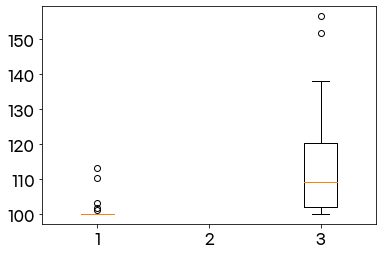

In [175]:
# 집단에 따른 분산

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1,x2, x3]

ax = plt.boxplot(plot_sp)
plt.savefig('./output/instagram/ANOVA_instagram3-1.png', transparent = True)
plt.show()

C:\Users\milky\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


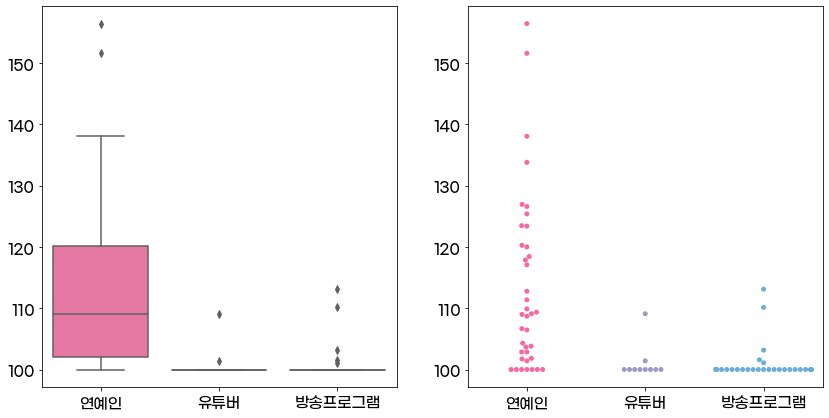

In [176]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["reliability2"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="reliability2",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/instagram/ANOVA_instagram3-2.png', transparent = True)
plt.show()

### 분석 결과 해석
: Pr(>F)== p-value. 
<hr>
모든 집단들이 등분산이 었으나, 일부 정규성을 갖지 않는 집단들이 있어, 이에 따라 결과가 오염되었을 가능성이 있음

#### 가설1 : 미디어에 따라 파급력의 차이가 있는가?  
분산분석: p-value가 0.05보다 작으므로, 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 유튜버 간의 차이가 유의하여 주효과가 나타난다.

#### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?  
분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.

#### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?  
분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.


-> 그러나 이 모든 주효과는 일부 집단의 데이터가 정규성을 띄지 않아서 나타났을 가능성이 높다.

<br>   

## 5. 시계열 분석

#### - 연예인: 하니칼국수 - 성시경  
#### - 유튜버: 코카모메-츄릅켠  
#### - 방송: 전참시-몽탄  
<hr>
: 월별 게시물 개수를 그래프로 그리고, 해당 게시물들의 누적 그래프

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

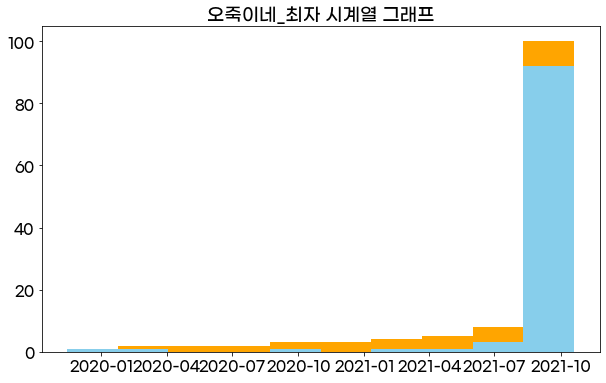

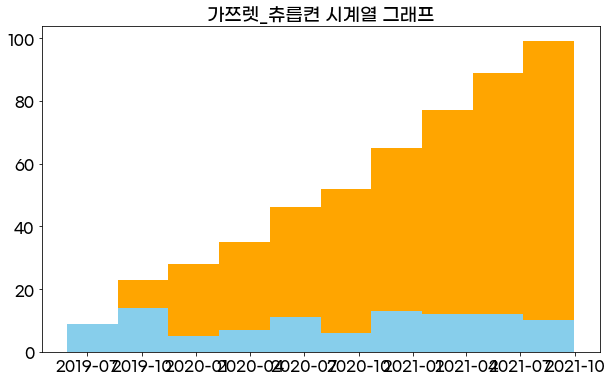

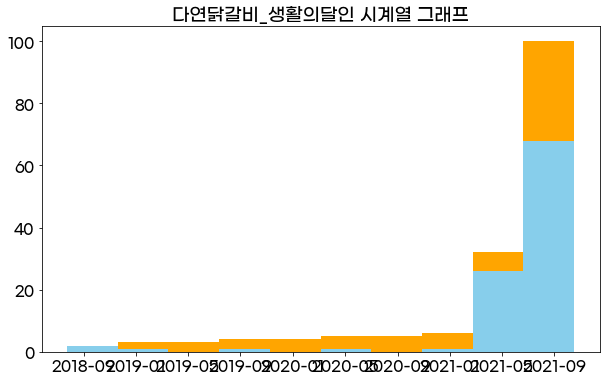

In [178]:
lists = ["오죽이네_최자", "가쯔렛_츄릅켠", "다연닭갈비_생활의달인"]
for item in lists:
    file = "./data/instagram/rowdata/" + item + ".csv"
    temp = pd.read_csv(file)
    temp.sort_values(by = "date", ascending=True, inplace=True)
    temp.date = pd.to_datetime(temp['date'])
    # 기간 나누기
    # temp['period'] = temp['postdate'].dt.to_period(freq='M')  # 년-월
    # 그래프 그리기
    plt.figure(figsize=(10,6))
    temp["test"] = 1
    plt.hist(temp["date"], weights=temp["test"], bins=10, cumulative = True, color="orange")
    plt.hist(temp["date"], weights=temp["test"], bins=10, cumulative = False, color="skyblue")
    plt.title(item + " 시계열 그래프")
    plt.show()

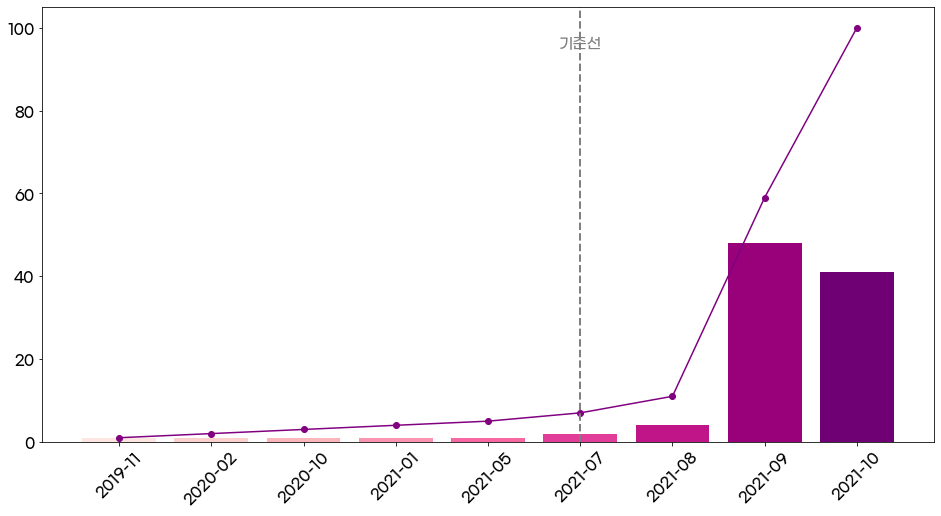

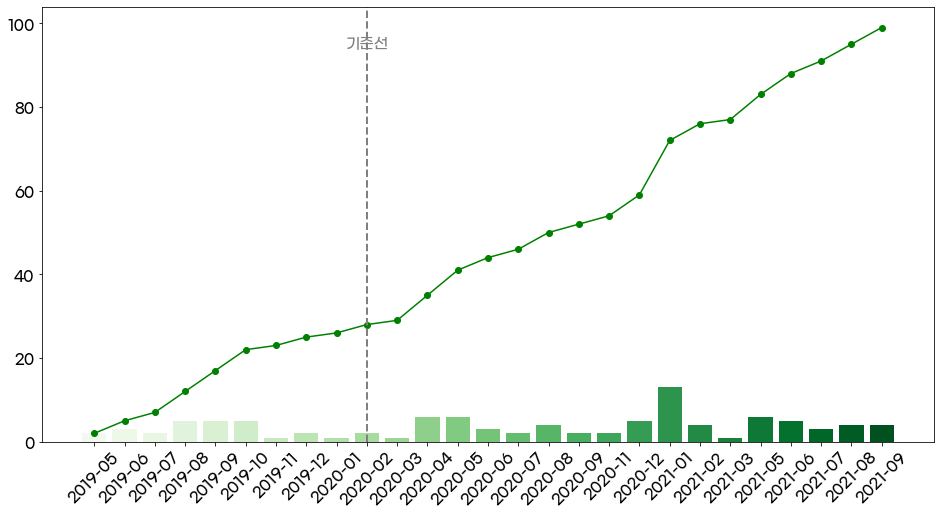

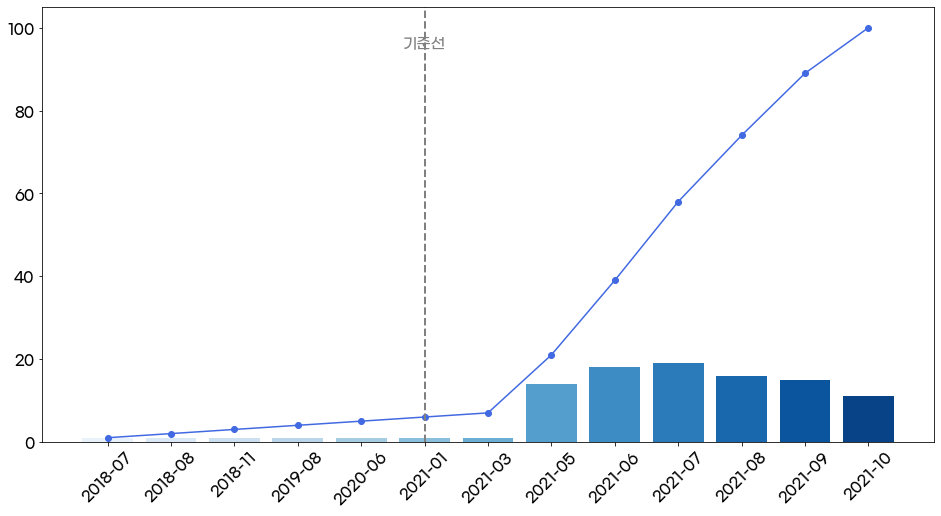

In [179]:
import numpy as np

plt.rc('font', size=15)
filelist = ["오죽이네_최자", "가쯔렛_츄릅켠", "다연닭갈비_생활의달인"]
referenceDate = ['2021-07', '2020-02', "2021-01"]
my_colors3 = ["RdPu", "Greens", "Blues"]
my_colors4 = ["purple", "green", "royalblue"]
for i in range(len(filelist)):
    file = "./data/instagram/rowdata/" + filelist[i] + ".csv"
    temp = pd.read_csv(file)
    temp.sort_values(by = "date", ascending=True, inplace=True)
    temp.date = pd.to_datetime(temp['date'])
    # 기간 나누기
    temp['period'] = temp['date'].dt.to_period(freq='M')  # 년-월
    # 기간별로 포스트 개수 세기
    period_count = temp.groupby("period").count()[["date"]]
    period_count.rename(columns = {"date": "count"}, inplace=True)
    # 누적합 열 추가하기
    period_count["cum"] = period_count[["count"]].cumsum()
    # 그래프 그리기
    plt.figure(figsize=(16,8))
    # 그래프를 그리기 위한 형변환
    period_count.index=period_count.index.to_series().astype(str)
    # 기준일 색깔 넣기
    my_color = np.where(period_count.index == referenceDate[0], 'skyblue', 'orange')
    # 라인그래프 그리기
    plt.plot(period_count.index, period_count["cum"], marker='o', color=my_colors4[i])
    # 기준일 그리기
    if referenceDate[i] == "2099-12":
            plt.text(len(period_count) / 2, period_count["cum"].max() * 0.95, "게시물 없음",       
             fontsize = 15, 
             color='gray',
             horizontalalignment='center') 
    else:
        plt.axvline(referenceDate[i], color='gray', linestyle='--', linewidth=2)
        plt.text(referenceDate[i], period_count["cum"].max() * 0.95, "기준선",       
                 fontsize = 15, 
                 color='gray',
                 horizontalalignment='center') 
     # 바그래프 그리기
    plt.bar(period_count.index, period_count["count"], align='center', 
            color=sns.color_palette(my_colors3[i], len(period_count)))
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.ylabel(None)
    if len(period_count) > 30 :
        plt.xticks(period_count.index, [period_count.index[j] if (j % (len(period_count)//20)) == 1 else "" for j in range(len(period_count))])
    plt.savefig('./output/instagram/' + filelist[i] + ' 시계열 그래프_instagram.png', transparent = True)
    plt.show()